In [1]:
import sys
print(sys.executable)


/Users/yaminmyataung/tensorflow-ml/.venv/bin/python


In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load MNIST from local cache (no internet)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = x_train / 255.0
x_test = x_test / 255.0

# Small split for validation
x_val, y_val = x_train[-10000:], y_train[-10000:]
x_tr, y_tr = x_train[:-10000], y_train[:-10000]

baseline = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

baseline.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_base = baseline.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)

test_loss_base, test_acc_base = baseline.evaluate(x_test, y_test, verbose=0)
print("Baseline test accuracy:", test_acc_base)


Epoch 1/5
391/391 - 1s - 2ms/step - accuracy: 0.8916 - loss: 0.3866 - val_accuracy: 0.9441 - val_loss: 0.2030
Epoch 2/5
391/391 - 0s - 933us/step - accuracy: 0.9488 - loss: 0.1819 - val_accuracy: 0.9595 - val_loss: 0.1489
Epoch 3/5
391/391 - 0s - 883us/step - accuracy: 0.9616 - loss: 0.1341 - val_accuracy: 0.9657 - val_loss: 0.1235
Epoch 4/5
391/391 - 0s - 887us/step - accuracy: 0.9700 - loss: 0.1050 - val_accuracy: 0.9691 - val_loss: 0.1085
Epoch 5/5
391/391 - 0s - 891us/step - accuracy: 0.9755 - loss: 0.0843 - val_accuracy: 0.9715 - val_loss: 0.1009
Baseline test accuracy: 0.9695000052452087


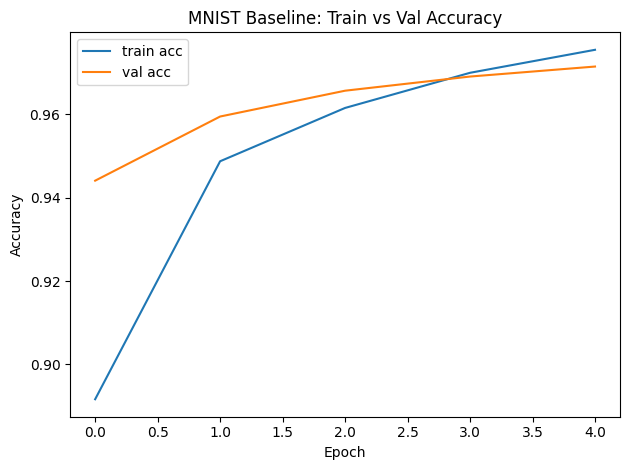

Saved: results/mnist_baseline_acc.png


In [8]:
os.makedirs("results", exist_ok=True)

plt.figure()
plt.plot(history_base.history["accuracy"], label="train acc")
plt.plot(history_base.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MNIST Baseline: Train vs Val Accuracy")
plt.legend()
plt.tight_layout()
plt.savefig("results/mnist_baseline_acc.png", dpi=200)
plt.show()

print("Saved: results/mnist_baseline_acc.png")


In [9]:
improved = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")
])

improved.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_imp = improved.fit(
    x_tr, y_tr,
    epochs=8,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)

test_loss_imp, test_acc_imp = improved.evaluate(x_test, y_test, verbose=0)
print("Improved test accuracy:", test_acc_imp)


Epoch 1/8
391/391 - 1s - 2ms/step - accuracy: 0.8612 - loss: 0.4775 - val_accuracy: 0.9452 - val_loss: 0.2065
Epoch 2/8
391/391 - 0s - 900us/step - accuracy: 0.9342 - loss: 0.2284 - val_accuracy: 0.9576 - val_loss: 0.1494
Epoch 3/8
391/391 - 0s - 906us/step - accuracy: 0.9491 - loss: 0.1769 - val_accuracy: 0.9657 - val_loss: 0.1225
Epoch 4/8
391/391 - 0s - 916us/step - accuracy: 0.9571 - loss: 0.1470 - val_accuracy: 0.9697 - val_loss: 0.1073
Epoch 5/8
391/391 - 0s - 916us/step - accuracy: 0.9631 - loss: 0.1279 - val_accuracy: 0.9720 - val_loss: 0.0985
Epoch 6/8
391/391 - 0s - 895us/step - accuracy: 0.9663 - loss: 0.1140 - val_accuracy: 0.9729 - val_loss: 0.0924
Epoch 7/8
391/391 - 0s - 1ms/step - accuracy: 0.9687 - loss: 0.1032 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 8/8
391/391 - 0s - 1ms/step - accuracy: 0.9721 - loss: 0.0920 - val_accuracy: 0.9757 - val_loss: 0.0852
Improved test accuracy: 0.973800003528595


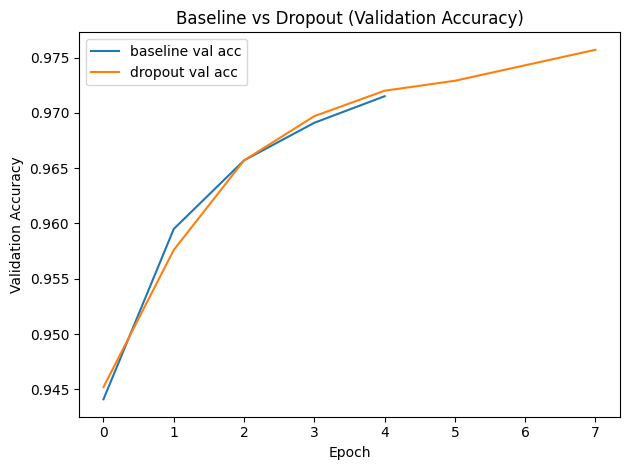

Saved: results/mnist_compare_val_acc.png

=== Summary ===
Baseline test acc : 0.9695000052452087
Dropout test acc  : 0.973800003528595


In [10]:
# Plot val accuracy comparison
plt.figure()
plt.plot(history_base.history["val_accuracy"], label="baseline val acc")
plt.plot(history_imp.history["val_accuracy"], label="dropout val acc")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Baseline vs Dropout (Validation Accuracy)")
plt.legend()
plt.tight_layout()
plt.savefig("results/mnist_compare_val_acc.png", dpi=200)
plt.show()

print("Saved: results/mnist_compare_val_acc.png")

# Simple comparison summary
print("\n=== Summary ===")
print("Baseline test acc :", test_acc_base)
print("Dropout test acc  :", test_acc_imp)
